In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import entropy 
from math import log 

 # 2 Herding and prefferential attachment

In [83]:
def equalDistrChoice(nodes):
    return str(np.random.randint(1, nodes.shape[0]+1))

def calcNodesProbs(nodes):
    return  (nodes["con_rank"]/(nodes["con_rank"].sum())).tolist()

def potentialDistrChoice(nodes):
    return str(np.random.choice(nodes.shape[0], 1 , p=calcNodesProbs(nodes))[0]+1)
    

def createNewNode(nodes, nodeChooseFunc):
    newNode = str(nodes.shape[0]+1)
    linkToNode = nodeChooseFunc(nodes)
    nodes.loc[newNode] = [newNode,[],[linkToNode],1]
    
    nodes.at[linkToNode, "con_rank"] += 1
    nodes.at[linkToNode, "in"].append(newNode)

In [84]:
columns=["name","in","out","con_rank"]
nodesEqual = pd.DataFrame(index=["1"],columns=columns, dtype="object")
nodesEqual.loc["1"] = ["1", ["1"], ["1"], 2]

In [85]:
iterations = 10000
for t in range(2,iterations+1):
    createNewNode(nodesEqual, equalDistrChoice)

In [86]:
nodesPotential = pd.DataFrame(index=["1"],columns=columns, dtype="object")
nodesPotential.loc["1"] = ["1", ["1"], ["1"], 2]

In [87]:
for t in range(2,iterations+1):
    createNewNode(nodesPotential, potentialDistrChoice)

In [88]:
#plot functions
def plotLogLog(x, y, toConcat=''):
    plt.subplots(figsize=(10, 10))
    plt.title("Rank distribution" + toConcat)
    plt.xlabel("log (Rank value)")
    plt.ylabel("log (Frequency)")
    plt.loglog(x,y,'r')
    plt.show()
    
def plotBar(x, y, toConcat=''):
    plt.subplots(figsize=(10, 10))
    plt.title("Rank distribution" + toConcat)
    plt.xlabel("Rank Value")
    plt.ylabel("Frequency")
    plt.scatter(x,y)
    plt.show()

In [89]:
def calcEntropy(ranks):
    resultEntropy = 0
    val, counts = np.unique(ranks, return_counts=True)
    probs = counts / len(ranks)
    if np.count_nonzero(probs) <= 1:
        return 0    
    for Pi in probs:
        resultEntropy += Pi * log(Pi, 2)
    return -1*resultEntropy

In [90]:
tmpEqual= (nodesEqual.con_rank.value_counts())
equalFrequency=pd.DataFrame({'index':tmpEqual.index, 'frequency':tmpEqual.values})
equalFrequency.sort_values(by=['index'])

tempPotential= (nodesPotential.con_rank.value_counts())
potentialFrequency=pd.DataFrame({'index':tempPotential.index, 'frequency':tempPotential.values})
potentialFrequency.sort_values(by=['index'])

,index,frequency
0,1,6693
1,2,1651
2,3,636
3,4,338
4,5,202
5,6,137
6,7,71
7,8,62
8,9,36
9,10,31


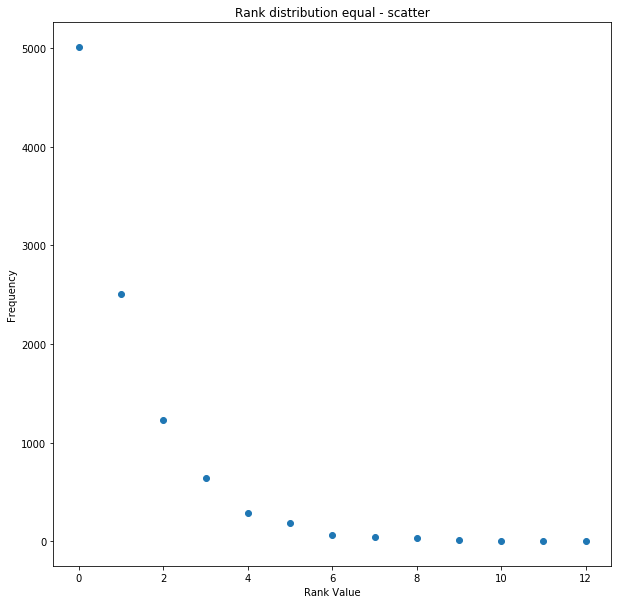

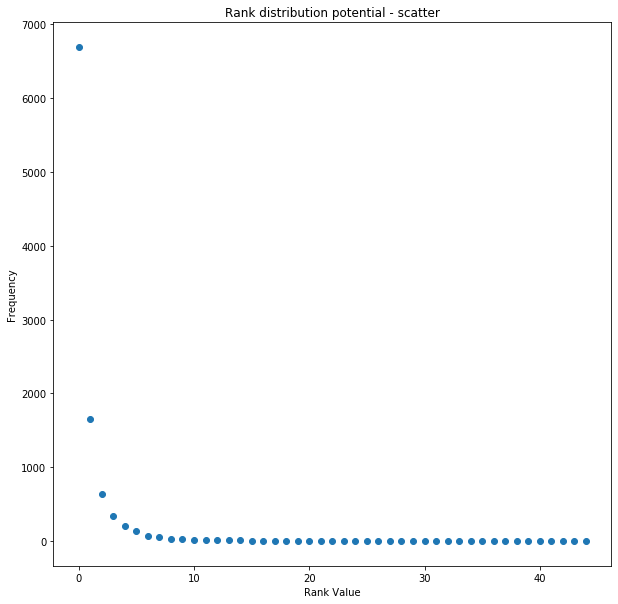

In [91]:
plotBar(equalFrequency.index,equalFrequency.frequency,' equal - scatter')
plotBar(potentialFrequency.index,potentialFrequency.frequency,' potential - scatter')


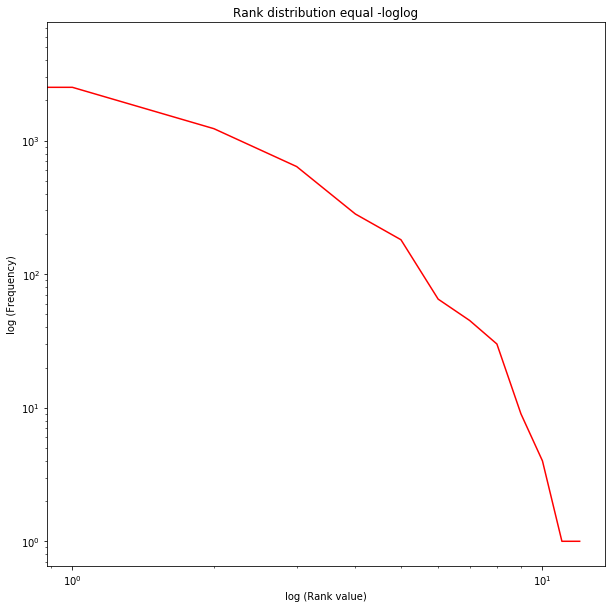

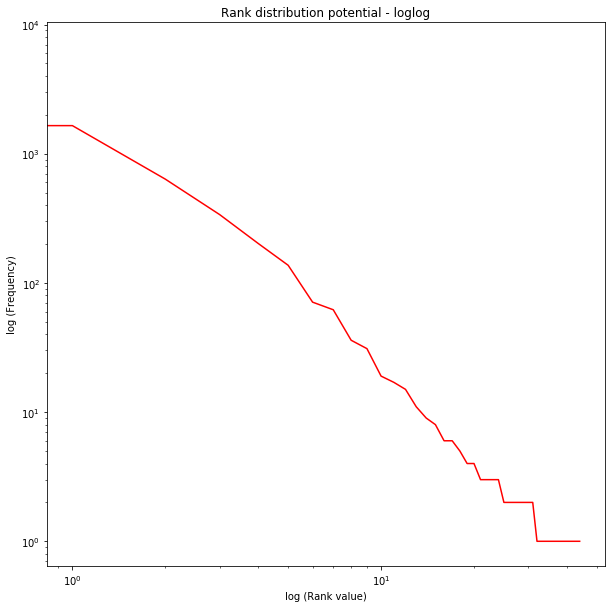

In [92]:
#2-1 LogLog Plot?
plotLogLog(equalFrequency.index,equalFrequency.frequency,' equal -loglog')
plotLogLog(potentialFrequency.index,potentialFrequency.frequency,' potential - loglog')

In [93]:
if(nodesEqual.con_rank.size==0):
    print('Entropy of equal distribution is ', 0)
else:    
    entropEqual=calcEntropy(nodesEqual.con_rank.tolist())
    print('Entropy of equal distribution is ', entropEqual)


if(nodesPotential.con_rank.size==0):
    print('Entropy of proportional distribution is ', 0)
else:    
    entropyPotential=calcEntropy(nodesPotential.con_rank.tolist())
    print('Entropy of proportional distribution is ' , entropyPotential) 


Entropy of equal distribution is  1.9986031329152827
Entropy of proportional distribution is  1.7353406371399016
